In [67]:
#import evverything needed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit

## Limb Angles

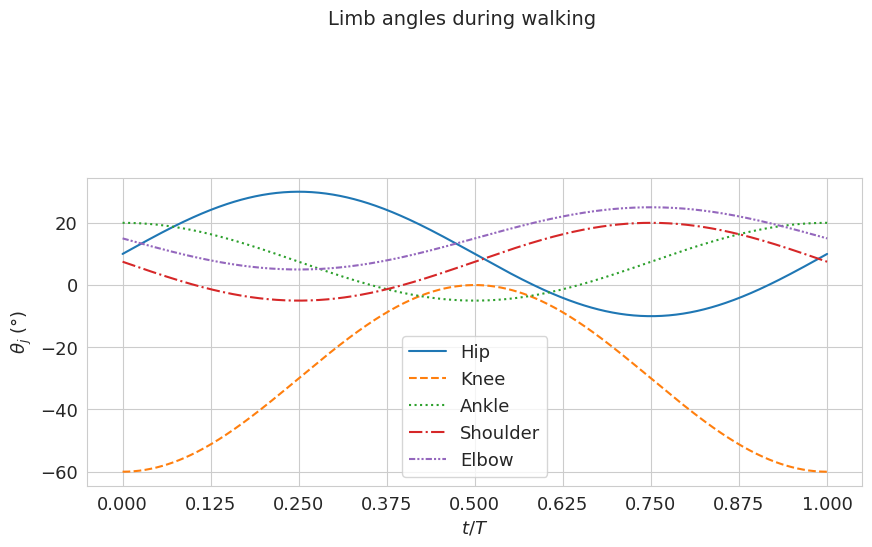

In [68]:
# Define the range of x values (one period typically from 0 to 2π)
x = np.linspace(0, 1, 500)

plt.figure(figsize=(10, 4))

# Plot each function
sns.set_style('whitegrid')
plt.plot(x, 10 + 20*np.sin(np.pi*2*x), label='Hip')
plt.plot(x, -30 - 30*np.cos(np.pi*2*x), label='Knee', linestyle='dashed')
plt.plot(x, 7.5 + 12.5*np.cos(np.pi*2*x), label='Ankle', linestyle='dotted')
plt.plot(x, 7.5 + -12.5*np.sin(np.pi*2*x), label='Shoulder', linestyle='dashdot')
plt.plot(x, 15 + -10*np.sin(np.pi*2*x), label='Elbow', linestyle=(0, (3, 1, 1, 1, 1, 1)))

# Customizing the plot
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.125))
plt.xlabel(r'$t/T$')
plt.ylabel(r'$\theta_j$ (°)')
plt.legend()

# Place the title 
plt.figtext(0.5, 1.3, 'Limb angles during walking', ha='center', va='top', fontsize=14)


# Save the plot to a file
plt.savefig('walking_limb_angles.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

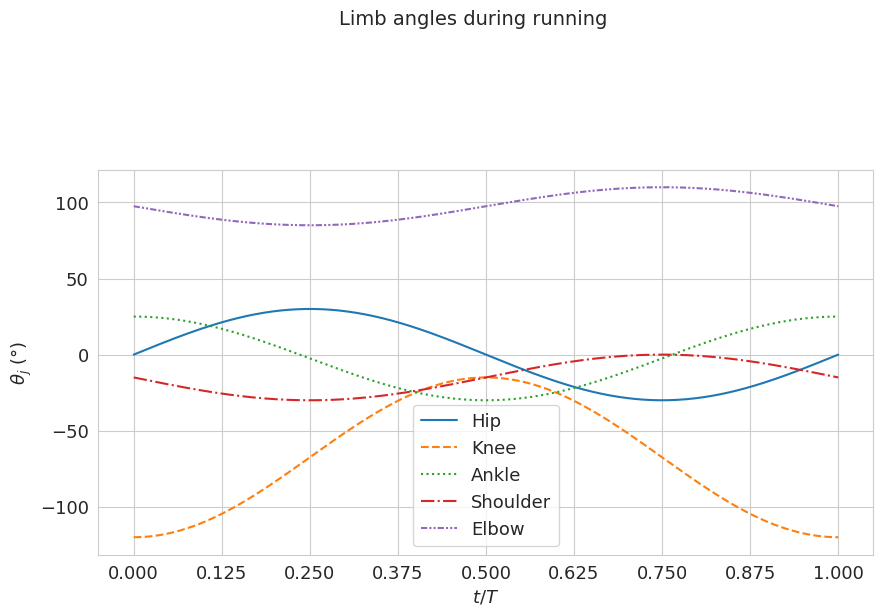

In [69]:
# Define the range of x values (one period typically from 0 to 2π)
x = np.linspace(0, 1, 500)

plt.figure(figsize=(10, 5))

# Plot each function
plt.plot(x, 0 + 30*np.sin(np.pi*2*x), label='Hip')
plt.plot(x, -67.5 - 52.5*np.cos(np.pi*2*x), label='Knee', linestyle='dashed')
plt.plot(x, -2.5 + 27.5*np.cos(np.pi*2*x), label='Ankle', linestyle='dotted')
plt.plot(x, -15 - 15*np.sin(np.pi*2*x), label='Shoulder', linestyle='dashdot')
plt.plot(x, 97.5 - 12.5*np.sin(np.pi*2*x), label='Elbow', linestyle=(0, (3, 1, 1, 1, 1, 1)))

# Customizing the plot
sns.set_style('whitegrid')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.125))
plt.xlabel(r'$t/T$')
plt.ylabel(r'$\theta_j$ (°)')
plt.legend()

# Place the title below the graph
plt.figtext(0.5, 1.2, 'Limb angles during running', ha='center', va='top', fontsize=14)


# Save the plot to a file
plt.savefig('running_limb_angles.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

## Code Validation

### Sphere

/tmp/ipykernel_5143/922535931.py:24: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


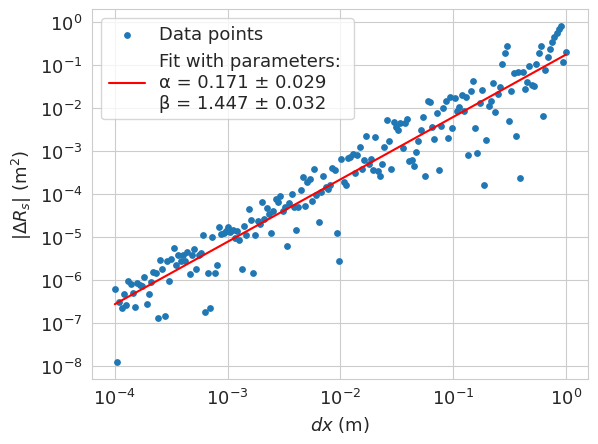

In [70]:
def anal_s(v, bodyvel, rad):
    surface = np.pi * rad ** 2
    return np.linalg.norm(v) * surface / bodyvel

def max_s(rad):
    return np.pi * rad ** 2

vrain = np.array( [0.5, 0.25, -1.])
bodyvel = 2.
v = vrain - np.array([bodyvel, 0., 0,])
rad = 0.5


# Read the data from the file
df = pd.read_csv('../data/Sphere/ErrorS.dat', sep=' ', header=None, names=['dx', 'num'], index_col=False)

# Transform the data
df['error'] = np.abs(df['num'] - anal_s( v, bodyvel, rad))
df['log_dx'] = np.log( df['dx'])
df['log_error'] = np.log( df['error'])

# Function to model (log-log power law)
def log_power_law(x, a, b):
    return np.log(a) +  b*x

# Fit the data to the power-law model
params, covariance = curve_fit(log_power_law, df['log_dx'], df['log_error'])

# Generate fitted values
fitted_error = np.exp(log_power_law(df['log_dx'], *params))

# Calculate the standard errors: the square root of the diagonal elements
standard_errors = np.sqrt(np.diag(covariance))

# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 13})

# Plotting the data
plt.scatter(df['dx'], df['error'], label='Data points', s=15)  
plt.xlabel(r'$dx$ (m)')
plt.ylabel(r'$|\Delta R_s|$ (m$^2$)') 

# Plot the fitted curve
plt.plot(df['dx'], fitted_error, color='red', label=f"Fit with parameters: \nα = {round(params[0],3)} ± {round(standard_errors[0], 3)}\nβ = {round(params[1], 3)} ± {round(standard_errors[1], 3)}")

# Settings
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/sphere_err_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_5143/3997883351.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


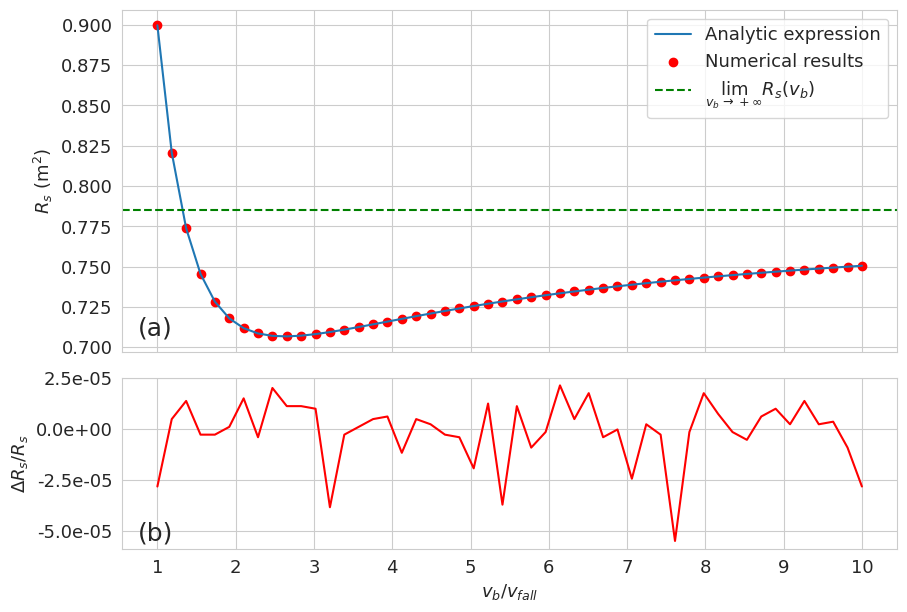

In [71]:
# Read the data from the file
with open("../data/Sphere/CompareS.dat", "r") as file:
    lines = file.readlines()

x_values = []
y1_values = []
y2_values = []

for line in lines:
    x, y1, y2 = map(float, line.split())
    x_values.append(x)
    y1_values.append(y1)
    y2_values.append(y2)

# Calculate the difference between Y1 and Y2
difference = [(y2 - y1) / y1 for y1, y2 in zip(y1_values, y2_values)]

# Create a figure with a gridspec layout
fig = plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.1)  # Reduced spacing

# Create subplots
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1)  # Share the x-axis with ax1

# Plot the primary data on the first subplot
ax1.plot(x_values, y1_values, label='Analytic expression')
ax1.scatter(x_values, y2_values, color='red', label='Numerical results')
ax1.axhline(y=max_s(rad), label=r'$\lim_{v_b\to+\infty} R_s(v_b)$', color='green', linestyle='dashed')  
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set_ylabel(r'$R_s$ (m$^2$)')
ax1.grid(True)
ax1.legend()
ax1.text(0.02, 0.05, "(a)", transform=ax1.transAxes, fontsize=18)


# Custom formatter function for scientific notation
def scientific_formatter(x, pos):
    return f'{x:.1e}'

# Apply the custom formatter to the y-axes
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(scientific_formatter))


# Plot the relative error on the second subplot
ax2.plot(x_values, difference, color='red')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.set_xlabel(r'$v_b/v_{fall}$')
ax2.set_ylabel(r'$\Delta R_s/R_s$')
ax2.grid(True)
ax2.text(0.02, 0.05, "(b)", transform=ax2.transAxes, fontsize=18)

# Hide x-labels and tick labels for top plots and y-tick labels for right plots
plt.setp(ax1.get_xticklabels(), visible=False)

# Adjust layout for clarity
plt.tight_layout()

# Save the plot to a file
plt.savefig('../Tesi/sphere_wet.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Parallelepiped

/tmp/ipykernel_5143/922535931.py:24: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


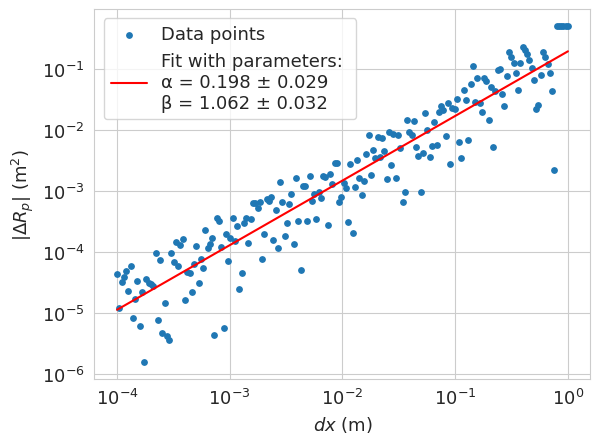

In [72]:
def anal_p(v, bodyvel, side):
    flux = 0
    flux += np.abs(np.dot(np.cross(side[0], side[1]), v))
    flux += np.abs(np.dot(np.cross(side[1], side[2]), v))
    flux += np.abs(np.dot(np.cross(side[2], side[0]), v))
    return flux/bodyvel

def max_p(side):
    flux = 0
    flux += np.abs(np.dot(np.cross(side[0], side[1]), [1,0,0]))
    flux += np.abs(np.dot(np.cross(side[1], side[2]), [1,0,0]))
    flux += np.abs(np.dot(np.cross(side[2], side[0]), [1,0,0]))
    return flux


side = [np.array([0.4, 0.0, 0.0]), np.array([0.0, 0.6, 0.0]), np.array([0.0, 0.0, 0.8])]

# Read the data from the file
df = pd.read_csv('../data/Pippo/ErrorP.dat', sep=' ', header=None, names=['dx', 'num'], index_col=False)

# Transform the data
df['error'] = np.abs(df['num'] - anal_p(v, bodyvel, side))
df['log_dx'] = np.log( df['dx'])
df['log_error'] = np.log( df['error'])

# Fit the data to the power-law model
params, covariance = curve_fit(log_power_law, df['log_dx'], df['log_error'])

# Generate fitted values
fitted_error = np.exp(log_power_law(df['log_dx'], *params))

# Plotting the data
plt.scatter(df['dx'], df['error'], label='Data points', s=15)  
plt.xlabel(r'$dx$ (m)')
plt.ylabel(r'$|\Delta R_p|$ (m$^2$)')  

# Plot the fitted curve
plt.plot(df['dx'], fitted_error, color='red', label=f"Fit with parameters: \nα = {round(params[0],3)} ± {round(standard_errors[0], 3)}\nβ = {round(params[1], 3)} ± {round(standard_errors[1], 3)}")

# Settings
plt.xscale('log')
plt.yscale('log')

plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/pippo_err_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_5143/2252489253.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


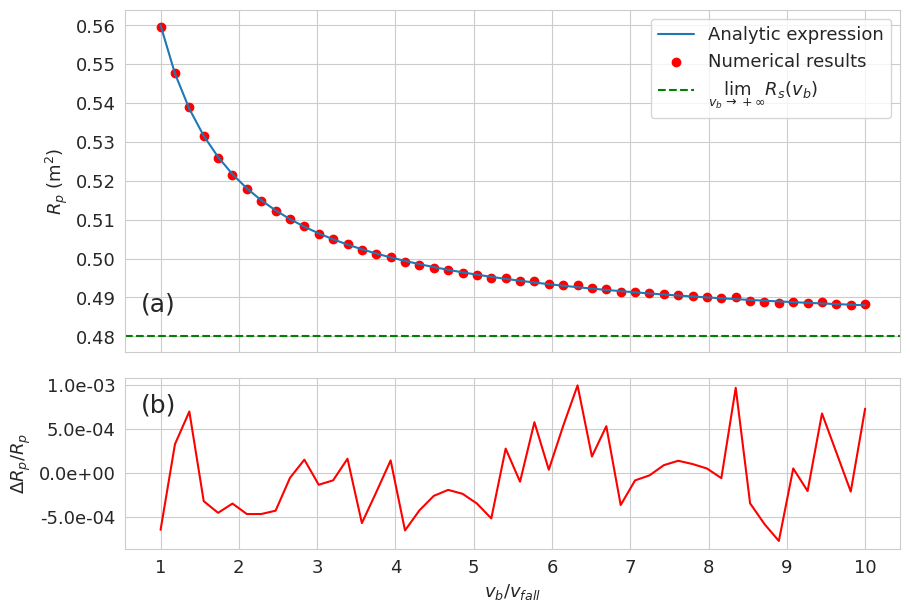

In [73]:
# Read the data from the file
with open("../data/Pippo/CompareP.dat", "r") as file:
    lines = file.readlines()

x_values = []
y1_values = []
y2_values = []

for line in lines:
    x, y1, y2 = map(float, line.split())
    x_values.append(x)
    y1_values.append(y1)
    y2_values.append(y2)

# Calculate the difference between Y1 and Y2
difference = [(y2 - y1) / y1 for y1, y2 in zip(y1_values, y2_values)]

# Create a figure with a gridspec layout
fig = plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.1)  # Reduced spacing

# Create subplots
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1)  # Share the x-axis with ax1

# Plot the primary data on the first subplot
ax1.plot(x_values, y1_values, label='Analytic expression')
ax1.scatter(x_values, y2_values, color='red', label='Numerical results')
ax1.axhline(y=max_p(side), label=r'$\lim_{v_b\to+\infty} R_s(v_b)$', color='green', linestyle='dashed') 
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set_ylabel(r'$R_p$ (m$^2$)')
ax1.grid(True)
ax1.legend()
ax1.text(0.02, 0.12, "(a)", transform=ax1.transAxes, fontsize=18)



# Apply the custom formatter to the y-axes
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(scientific_formatter))


# Plot the relative error on the second subplot
ax2.plot(x_values, difference, color='red')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.set_xlabel(r'$v_b/v_{fall}$')
ax2.set_ylabel(r'$\Delta R_p/R_p$')
ax2.grid(True)
ax2.text(0.02, 0.8, "(b)", transform=ax2.transAxes, fontsize=18)

# Hide x-labels and tick labels for top plots and y-tick labels for right plots
plt.setp(ax1.get_xticklabels(), visible=False)

# Adjust layout for clarity
plt.tight_layout()

# Save the plot to a file
plt.savefig('../Tesi/pippo_wet.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Capsule

/tmp/ipykernel_5143/922535931.py:24: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


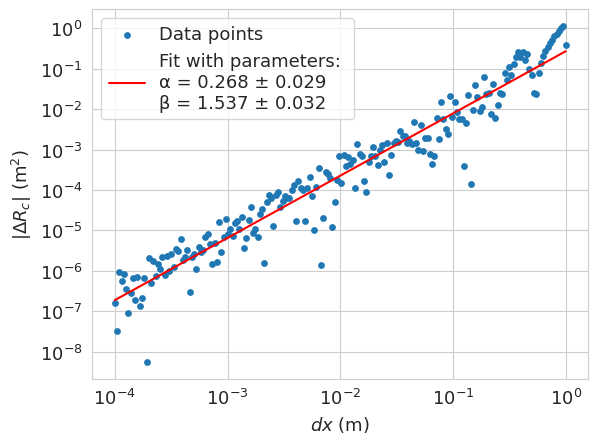

In [74]:
def anal_c(v, bodyvel, l1, l2, rad):
    # Vector subtraction to get the axis
    axis = np.array(l1) - np.array(l2)

    # Adjusting the axis based on v
    axis -= np.dot(v, axis) * np.array(v) / np.dot(v, v)

    # Calculating the norm of the axis
    L = np.linalg.norm(axis)

    # Computing the surface
    surface = np.pi * rad ** 2 + L * 2 * rad

    # Returning the final result
    return np.linalg.norm(v) * surface / bodyvel

def max_c( l1, l2, rad):
    # Vector subtraction to get the axis
    axis = np.array(l1) - np.array(l2)

    # Adjusting the axis based on v
    axis -= np.dot([1,0,0], axis) * np.array([1,0,0])

    # Calculating the norm of the axis
    L = np.linalg.norm(axis)

    # Returning the final result
    return np.pi * rad ** 2 + L * 2 * rad

r = 0.3
l1 = np.array( [0.35, 0.35, 0.35])
l2 = np.array( [0.75, 0.75, 0.75])


# Read the data from the file
df = pd.read_csv('../data/Capsule/ErrorC.dat', sep=' ', header=None, names=['dx', 'num'], index_col=False)

# Transform the data
df['error'] = np.abs(df['num'] - anal_c(v, bodyvel, l1, l2, r))
df['log_dx'] = np.log( df['dx'])
df['log_error'] = np.log( df['error'])


# Fit the data to the power-law model
params, covariance = curve_fit(log_power_law, df['log_dx'], df['log_error'])

# Generate fitted values
fitted_error = np.exp(log_power_law(df['log_dx'], *params))

# Plotting the data
plt.scatter(df['dx'], df['error'], label='Data points', s=15)  
plt.xlabel(r'$dx$ (m)')
plt.ylabel(r'$|\Delta R_c|$ (m$^2$)')  

# Plot the fitted curve
plt.plot(df['dx'], fitted_error, color='red', label=f"Fit with parameters: \nα = {round(params[0],3)} ± {round(standard_errors[0], 3)}\nβ = {round(params[1], 3)} ± {round(standard_errors[1], 3)}")

# Settings
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/capsule_err_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_5143/3262682699.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


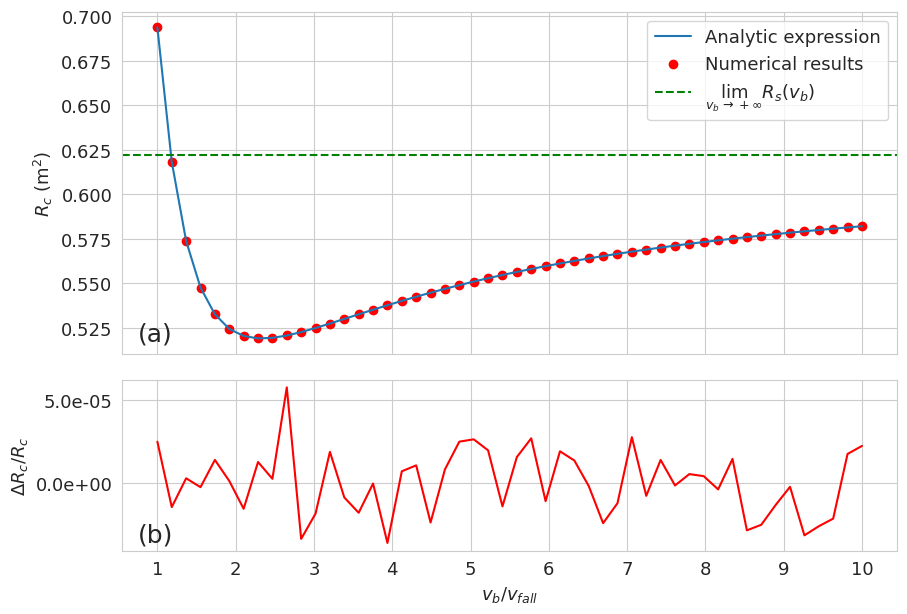

In [75]:
# Read the data from the file
with open("../data/Capsule/CompareC.dat", "r") as file:
    lines = file.readlines()

x_values = []
y1_values = []
y2_values = []

for line in lines:
    x, y1, y2 = map(float, line.split())
    x_values.append(x)
    y1_values.append(y1)
    y2_values.append(y2)

# Calculate the difference between Y1 and Y2
difference = [(y2 - y1) / y1 for y1, y2 in zip(y1_values, y2_values)]

# Create a figure with a gridspec layout
fig = plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.1)  # Reduced spacing

# Create subplots
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1)  # Share the x-axis with ax1

# Plot the primary data on the first subplot
ax1.plot(x_values, y1_values, label='Analytic expression')
ax1.scatter(x_values, y2_values, color='red', label='Numerical results')
ax1.axhline(y=max_c(l1, l2, r), label=r'$\lim_{v_b\to+\infty} R_s(v_b)$', color='green', linestyle='dashed')  
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set_ylabel(r'$R_c$ (m$^2$)')
ax1.grid(True)
ax1.legend()
ax1.text(0.02, 0.04, "(a)", transform=ax1.transAxes, fontsize=18)


# Apply the custom formatter to the y-axes
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(scientific_formatter))


# Plot the relative error on the second subplot
ax2.plot(x_values, difference, color='red')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.set_xlabel(r'$v_b/v_{fall}$')
ax2.set_ylabel(r'$\Delta R_c/R_c$')
ax2.grid(True)
ax2.text(0.02, 0.05, "(b)", transform=ax2.transAxes, fontsize=18)

# Hide x-labels and tick labels for top plots and y-tick labels for right plots
plt.setp(ax1.get_xticklabels(), visible=False)

# Adjust layout for clarity
plt.tight_layout()

# Save the plot to a file
plt.savefig('../Tesi/capsule_wet.png')

# Show the plot
plt.show()

### Double Parallelepiped

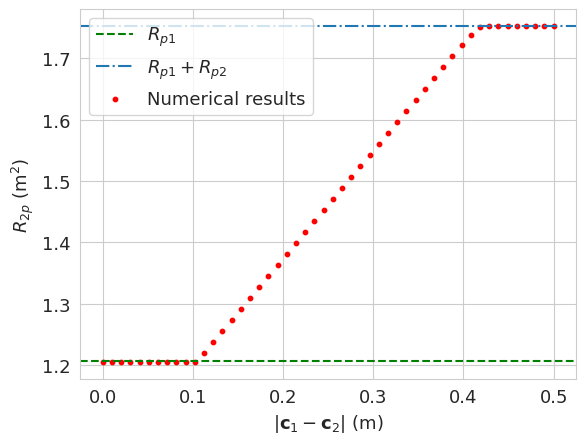

In [76]:
# Read the data from the file
df = pd.read_csv('../data/Pippo/DoubleP.dat', sep=' ', header=None, names=['dist', 'R'], index_col=False)

# Plot min and max
v_rel = [-0.52, 0.03, -1]
body_vel = 0.52
s1 = anal_p(v=v_rel, bodyvel=body_vel, side= [ [0.8, 0, 0], [0, 0.5, 0], [0, 0, 0.8]])
s2 = anal_p(v=v_rel, bodyvel=body_vel, side= [ [0.6, 0, 0], [0, 0.3, 0], [0, 0, 0.6]])
plt.axhline(y=s1, label=r'$R_{p1}$', color='green', linestyle='dashed')  
plt.axhline(y=s1+s2, label=r'$R_{p1} +R_{p2}$', linestyle='dashdot')  
# Plot the fitted curve
plt.scatter(df['dist'], df['R'], label="Numerical results", s=10, color='red')

plt.xlabel(r'$|\mathbf{c}_1 - \mathbf{c}_2|$ (m)')
plt.ylabel(r'$R_{2p}$ (m$^2$)')



plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/2pippo_wet.png', dpi=300, bbox_inches='tight')

## Results

### Error Analysis

In [142]:
# Function to model (log-log power law)
def power_law(x, R, A, B):
    return R + A*(x**B)

/tmp/ipykernel_5143/922535931.py:24: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


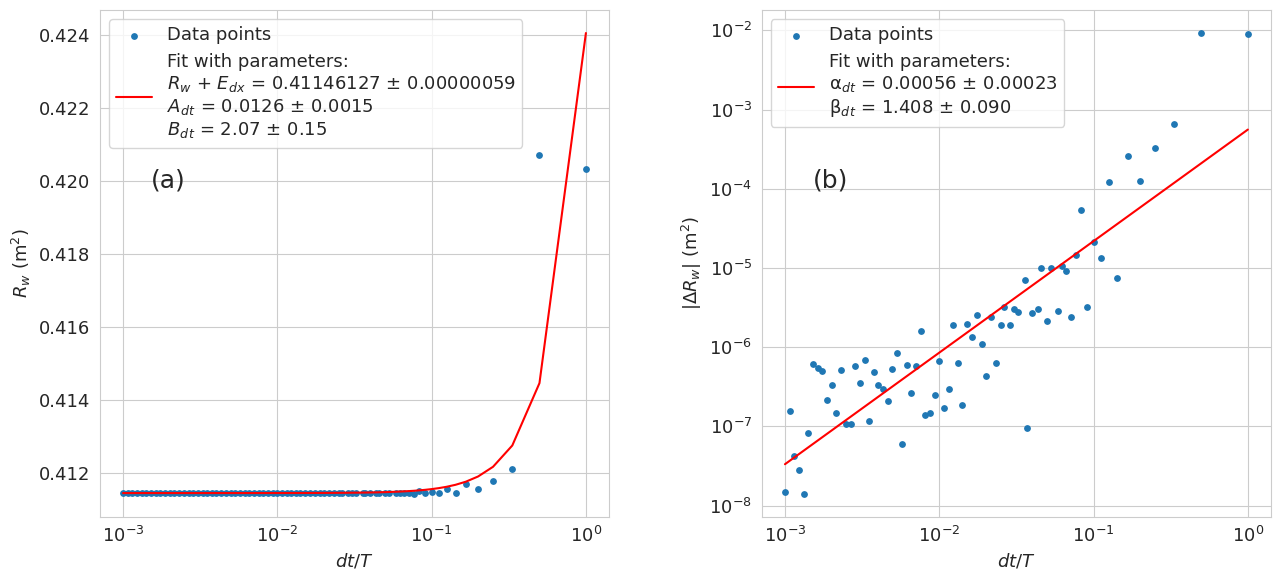

In [178]:
# Read the data from the file
df = pd.read_csv('../data/Walk/ErrT.dat', sep=' ', header=None, names=['nstep', 'num'], index_col=False)

# Transform the data
df['dt'] = 1/(df['nstep'])


# Fit the data to the power-law model
params, covariance = curve_fit(power_law, df['dt'], df['num'], sigma=df['dt'])

# Generate fitted values
fitted_error = power_law(df['dt'], *params)

# Calculate the standard errors: the square root of the diagonal elements
standard_errors = np.sqrt(np.diag(covariance))

# Create a figure with two subplots (side by side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))  # Adjust the figsize to fit your needs

# Plotting the data on the first subplot
ax1.scatter(df['dt'], df['num'], label='Data points', s=15)
ax1.set_xlabel(r'$dt/T$')
ax1.set_ylabel(r'$R_w$ (m$^2$)')
# Plot the fitted curve on the first subplot
ax1.plot(df['dt'], fitted_error, color='red', label="Fit with parameters: \n$R_w$ + $E_d$$_x$ = {:.8f} ± {:.8f}\n$A_d$$_t$ = {:.4f} ± {:.4f}\n$B_d$$_t$ = {:.2f} ± {:.2f}".format(params[0], standard_errors[0], params[1], standard_errors[1], params[2], standard_errors[2]))
ax1.set_xscale('log')
ax1.grid(True)
ax1.legend()
ax1.text(0.1, 0.65, "(a)", transform=ax1.transAxes, fontsize=18)

# Transform the data for the second plot
df['error'] = np.abs(df['num'] - params[0])
df['log_dt'] = np.log(df['dt'])
df['log_error'] = np.log(df['error'])


# Fit the data to the log-power-law model
params, covariance = curve_fit(log_power_law, df['log_dt'], df['log_error'])
# Calculate the standard errors again, assuming it's required for the second fit
standard_errors = np.sqrt(np.diag(covariance))
# Generate fitted values for the second plot
fitted_error = np.exp(log_power_law(df['log_dt'], *params))

# Plotting the data on the second subplot
ax2.scatter(df['dt'], df['error'], label='Data points', s=15)
ax2.set_xlabel(r'$dt/T$')
ax2.set_ylabel(r'$|\Delta R_w|$ (m$^2$)')
# Plot the fitted curve on the second subplot
ax2.plot(df['dt'], fitted_error, color='red', label="Fit with parameters: \nα$_d$$_t$ = {:.5f} ± {:.5f}\nβ$_d$$_t$ = {:.3f} ± {:.3f}".format(params[0], standard_errors[0], params[1], standard_errors[1]))
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True)
ax2.legend()
ax2.text(0.1, 0.65, "(b)", transform=ax2.transAxes, fontsize=18)

# Adjust the layout so everything fits without overlapping
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust the width space between the subplots

# Save the figure to a file
plt.savefig('../Tesi/walk_fit_dt.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_5143/922535931.py:24: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


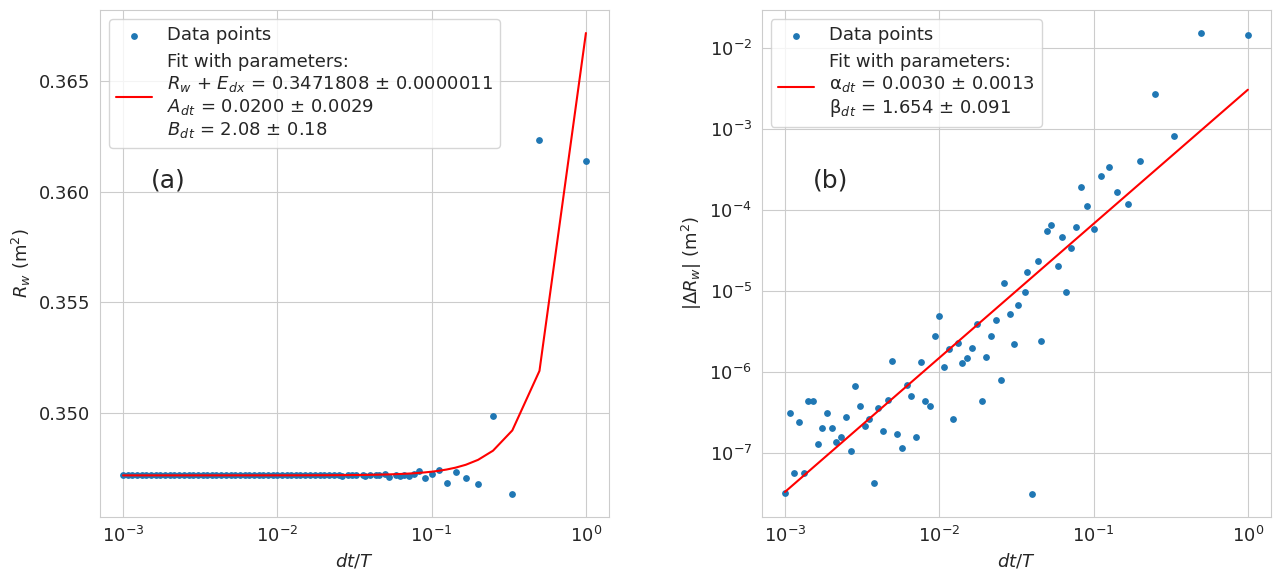

In [180]:
# Read the data from the file
df = pd.read_csv('../data/Run/ErrT.dat', sep=' ', header=None, names=['nstep', 'num'], index_col=False)

# Transform the data
df['dt'] = 1/(df['nstep'])


# Fit the data to the power-law model
params, covariance = curve_fit(power_law, df['dt'], df['num'], sigma=df['dt'])

# Generate fitted values
fitted_error = power_law(df['dt'], *params)

# Calculate the standard errors: the square root of the diagonal elements
standard_errors = np.sqrt(np.diag(covariance))

# Create a figure with two subplots (side by side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))  # Adjust the figsize to fit your needs

# Plotting the data on the first subplot
ax1.scatter(df['dt'], df['num'], label='Data points', s=15)
ax1.set_xlabel(r'$dt/T$')
ax1.set_ylabel(r'$R_w$ (m$^2$)')
# Plot the fitted curve on the first subplot
ax1.plot(df['dt'], fitted_error, color='red', label="Fit with parameters: \n$R_w$ + $E_d$$_x$ = {:.7f} ± {:.7f}\n$A_d$$_t$ = {:.4f} ± {:.4f}\n$B_d$$_t$ = {:.2f} ± {:.2f}".format(params[0], standard_errors[0], params[1], standard_errors[1], params[2], standard_errors[2]))
ax1.set_xscale('log')
ax1.grid(True)
ax1.legend()
ax1.text(0.1, 0.65, "(a)", transform=ax1.transAxes, fontsize=18)

# Transform the data for the second plot
df['error'] = np.abs(df['num'] - params[0])
df['log_dt'] = np.log(df['dt'])
df['log_error'] = np.log(df['error'])


# Fit the data to the log-power-law model
params, covariance = curve_fit(log_power_law, df['log_dt'], df['log_error'])
# Calculate the standard errors again, assuming it's required for the second fit
standard_errors = np.sqrt(np.diag(covariance))
# Generate fitted values for the second plot
fitted_error = np.exp(log_power_law(df['log_dt'], *params))

# Plotting the data on the second subplot
ax2.scatter(df['dt'], df['error'], label='Data points', s=15)
ax2.set_xlabel(r'$dt/T$')
ax2.set_ylabel(r'$|\Delta R_w|$ (m$^2$)')
# Plot the fitted curve on the second subplot
ax2.plot(df['dt'], fitted_error, color='red', label="Fit with parameters: \nα$_d$$_t$ = {:.4f} ± {:.4f}\nβ$_d$$_t$ = {:.3f} ± {:.3f}".format(params[0], standard_errors[0], params[1], standard_errors[1]))
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True)
ax2.legend()
ax2.text(0.1, 0.65, "(b)", transform=ax2.transAxes, fontsize=18)

# Adjust the layout so everything fits without overlapping
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust the width space between the subplots

# Save the figure to a file
plt.savefig('../Tesi/run_fit_dt.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_5143/922535931.py:24: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


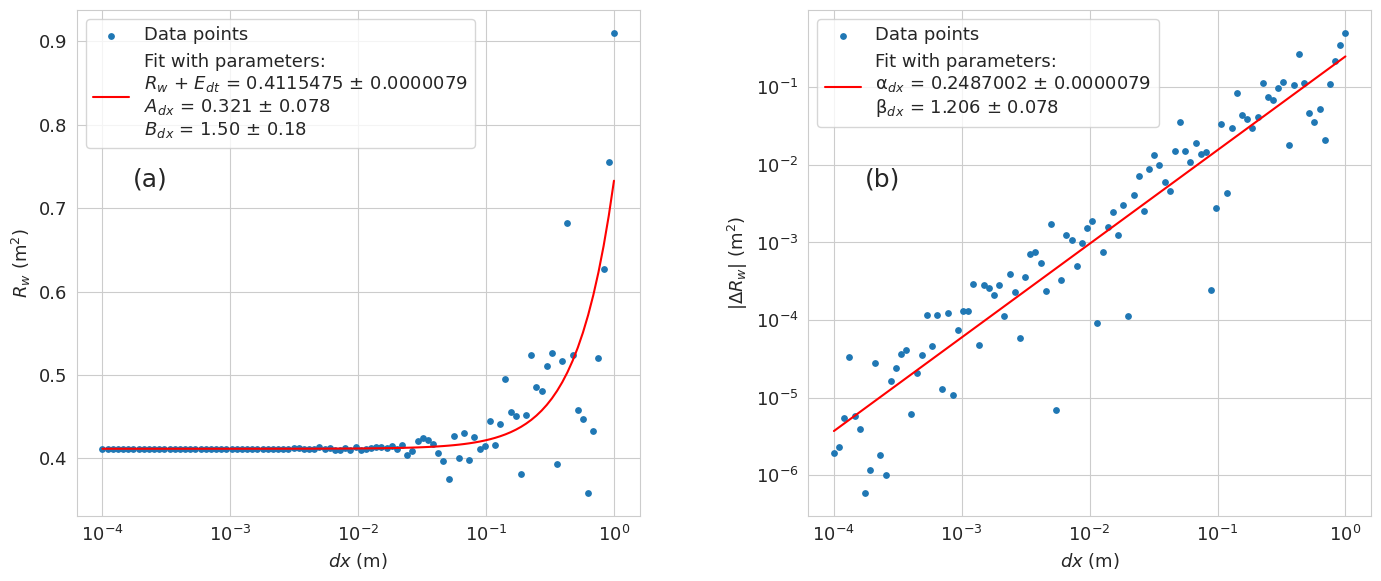

In [182]:
# Read the data from the file
df = pd.read_csv('../data/Walk/ErrDx.dat', sep=' ', header=None, names=['dx', 'num'], index_col=False)

# Fit the data to the power-law model
params, covariance = curve_fit(power_law, df['dx'], df['num'], sigma=df['dx'])

# Generate fitted values
fitted_error = power_law(df['dx'], *params)

# Calculate the standard errors: the square root of the diagonal elements
standard_errors = np.sqrt(np.diag(covariance))

# Adjust the font size for readability
plt.rcParams.update({'font.size': 13})

# Create a figure with two subplots (side by side) with more space
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the data on the first subplot
ax1.scatter(df['dx'], df['num'], label='Data points', s=15)
ax1.set_xlabel(r'$dx$ (m)')
ax1.set_ylabel(r'$R_w$ (m$^2$)')
# Plot the fitted curve on the first subplot
ax1.plot(df['dx'], fitted_error, color='red', label="Fit with parameters: \n$R_w$ + $E_d$$_t$ = {:.7f} ± {:.7f}\n$A_d$$_x$ = {:.3f} ± {:.3f}\n$B_d$$_x$ = {:.2f} ± {:.2f}".format(params[0], standard_errors[0], params[1], standard_errors[1], params[2], standard_errors[2]))
ax1.set_xscale('log')
ax1.grid(True)
ax1.legend()
ax1.text(0.1, 0.65, "(a)", transform=ax1.transAxes, fontsize=18)

# Transform the data for the second plot
df['error'] = np.abs(df['num'] - params[0])
df['log_dx'] = np.log(df['dx'])
df['log_error'] = np.log(df['error'])

# Fit the data to the log-power-law model for the second plot
params, covariance = curve_fit(log_power_law, df['log_dx'], df['log_error'])
# Generate fitted values for the second plot
fitted_error = np.exp(log_power_law(df['log_dx'], *params))

# Plotting the data on the second subplot
ax2.scatter(df['dx'], df['error'], label='Data points', s=15)
ax2.set_xlabel(r'$dx$ (m)')
ax2.set_ylabel(r'$|\Delta R_w|$ (m$^2$)')
# Plot the fitted curve on the second subplot
ax2.plot(df['dx'], fitted_error, color='red', label="Fit with parameters: \nα$_d$$_x$ = {:.7f} ± {:.7f}\nβ$_d$$_x$ = {:.3f} ± {:.3f}".format(params[0], standard_errors[0], params[1], standard_errors[1]))
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True)
ax2.legend()
ax2.text(0.1, 0.65, "(b)", transform=ax2.transAxes, fontsize=18)


# Adjust the layout and spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust the width space between the subplots

# Save the figure to a file
plt.savefig('../Tesi/walk_fit_dx.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


/tmp/ipykernel_5143/922535931.py:24: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


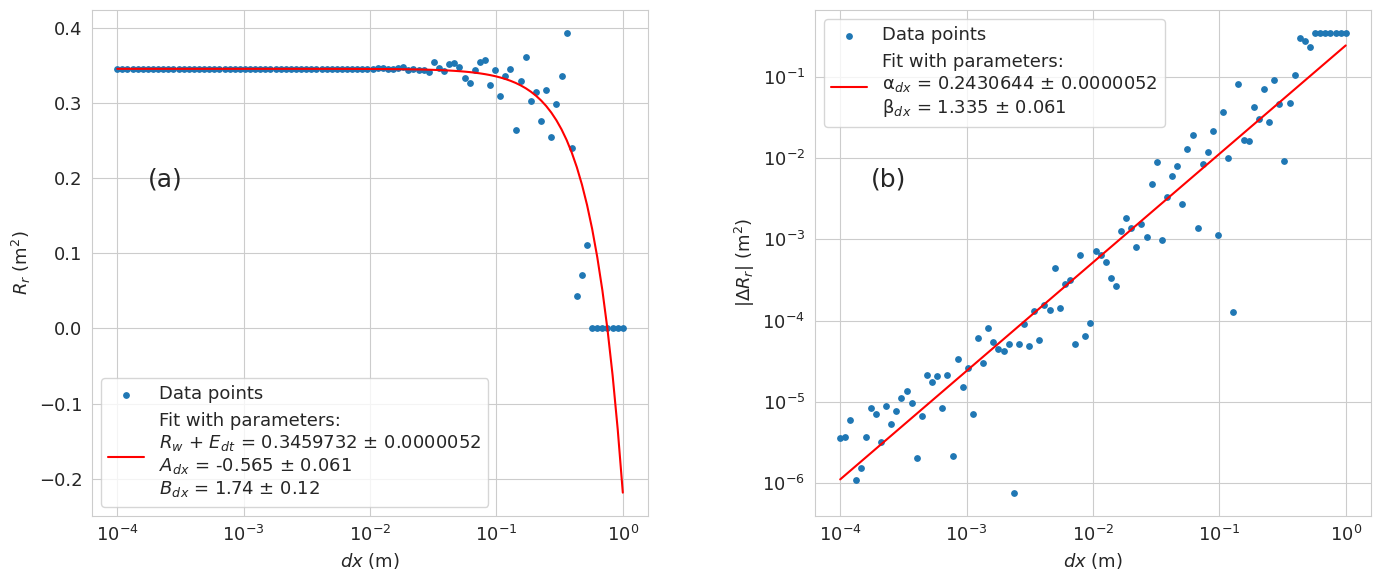

In [184]:
# Read the data from the file
df = pd.read_csv('../data/Run/ErrDx.dat', sep=' ', header=None, names=['dx', 'num'], index_col=False)

# Fit the data to the power-law model
params, covariance = curve_fit(power_law, df['dx'], df['num'], sigma=df['dx'])

# Generate fitted values
fitted_error = power_law(df['dx'], *params)

# Calculate the standard errors: the square root of the diagonal elements
standard_errors = np.sqrt(np.diag(covariance))

# Adjust the font size for readability
plt.rcParams.update({'font.size': 13})

# Create a figure with two subplots (side by side) with more space
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the data on the first subplot
ax1.scatter(df['dx'], df['num'], label='Data points', s=15)
ax1.set_xlabel(r'$dx$ (m)')
ax1.set_ylabel(r'$R_r$ (m$^2$)')
# Plot the fitted curve on the first subplot
ax1.plot(df['dx'], fitted_error, color='red', label="Fit with parameters: \n$R_w$ + $E_d$$_t$ = {:.7f} ± {:.7f}\n$A_d$$_x$ = {:.3f} ± {:.3f}\n$B_d$$_x$ = {:.2f} ± {:.2f}".format(params[0], standard_errors[0], params[1], standard_errors[1], params[2], standard_errors[2]))
ax1.set_xscale('log')
ax1.grid(True)
ax1.legend()
ax1.text(0.1, 0.65, "(a)", transform=ax1.transAxes, fontsize=18)

# Transform the data for the second plot
df['error'] = np.abs(df['num'] - params[0])
df['log_dx'] = np.log(df['dx'])
df['log_error'] = np.log(df['error'])

# Fit the data to the log-power-law model for the second plot
params, covariance = curve_fit(log_power_law, df['log_dx'], df['log_error'])
# Generate fitted values for the second plot
fitted_error = np.exp(log_power_law(df['log_dx'], *params))

# Plotting the data on the second subplot
ax2.scatter(df['dx'], df['error'], label='Data points', s=15)
ax2.set_xlabel(r'$dx$ (m)')
ax2.set_ylabel(r'$|\Delta R_r|$ (m$^2$)')
# Plot the fitted curve on the second subplot
ax2.plot(df['dx'], fitted_error, color='red', label="Fit with parameters: \nα$_d$$_x$ = {:.7f} ± {:.7f}\nβ$_d$$_x$ = {:.3f} ± {:.3f}".format(params[0], standard_errors[0], params[1], standard_errors[1]))
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True)
ax2.legend()
ax2.text(0.1, 0.65, "(b)", transform=ax2.transAxes, fontsize=18)


# Adjust the layout and spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust the width space between the subplots

# Save the figure to a file
plt.savefig('../Tesi/run_fit_dx.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Optimal velocity

In [85]:
# Define human parallelepiped
Hsides = [0.14, 0.42, 1.68 ]

def VoptS( v_tail, v_cross ):
    if( v_tail > 0 ): return ( v_tail**2 + v_cross**2 + 1 )/v_tail
    else: return -1

def VoptP( v_tail, v_cross, sides ):
    if( v_tail > (sides[0]*sides[2]*abs(v_cross) + sides[0]*sides[1])/(sides[1]*sides[2]) ): return v_tail
    else: return -1

# def VoptS( v_tail, v_cross, vmax ):
#     if( v_tail > 0 ): return min( (( v_tail**2 + v_cross**2 + 1 )/v_tail), vmax)
#     else: return -1

# def VoptP( v_tail, v_cross, sides, vmax ):
#     if( v_tail > (sides[0]*sides[2]*abs(v_cross) + sides[0]*sides[1])/(sides[1]*sides[2]) ): return min( v_tail, vmax ) 
#     else: return -1

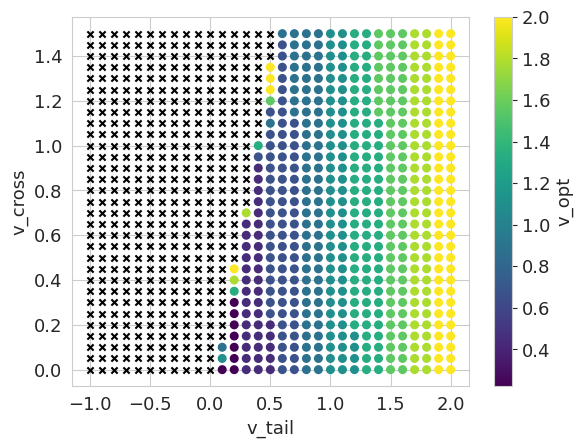

In [86]:
# Read the Data
data = pd.read_csv('../data/Pippo/OptMap.dat', sep=' ', header=None, names=['vtail', 'vcross', 'vopt'], index_col=False)



# Separate data into two subsets
data_positive_vopt = data[data['vopt'] >= 0]
data_negative_vopt = data[data['vopt'] < 0]

# Plot the Data for negative vopt with a different shape
plt.scatter(data_negative_vopt['vtail'], data_negative_vopt['vcross'], color='black', s=20, marker='x', label='vopt < 0')

# Plot the Data using a Scatter Plot with a Colormap for positive vopt
plt.scatter(data_positive_vopt['vtail'], data_positive_vopt['vcross'], c=data_positive_vopt['vopt'], cmap='viridis', s=30, marker='o', label='vopt >= 0')



plt.colorbar(label='v_opt')
plt.xlabel('v_tail')
plt.ylabel('v_cross')
# plt.legend()
plt.show()




Text(0, 0.5, 'v_cross')

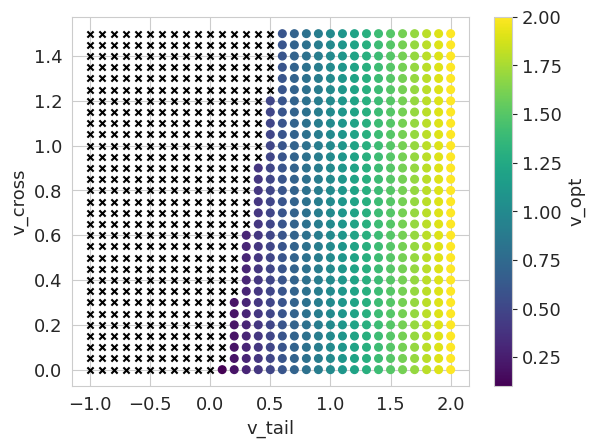

In [87]:
# Analyutical graph for sphere
data['voptHP'] = data.apply(lambda row: VoptP(row['vtail'], row['vcross'], Hsides), axis=1)

# Separate data into two subsets
data_positive_voptS = data[data['voptHP'] >= 0]
data_negative_voptS = data[data['voptHP'] < 0]

# Plot the Data for negative voptHP with a different shape
plt.scatter(data_negative_voptS['vtail'], data_negative_voptS['vcross'], color='black', s=20, marker='x', label='voptHP < 0')

# Plot the Data using a Scatter Plot with a Colormap for positive voptHP
plt.scatter(data_positive_voptS['vtail'], data_positive_voptS['vcross'], c=data_positive_voptS['voptHP'], cmap='viridis', s=30, marker='o', label='voptHP >= 0')



plt.colorbar(label='v_opt')
plt.xlabel('v_tail')
plt.ylabel('v_cross')
# plt.legend()

Text(0, 0.5, 'v_cross')

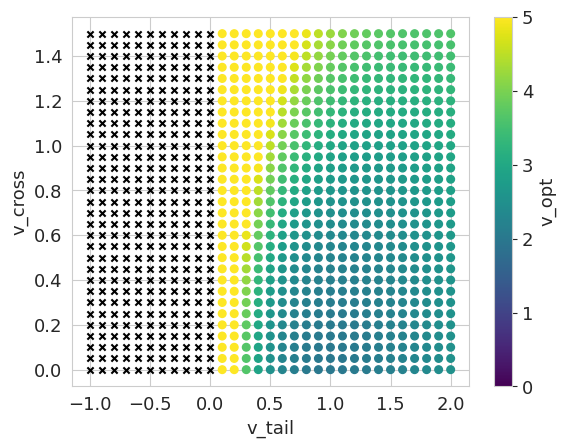

In [88]:
# Analyutical graph for sphere
data['voptS'] = data.apply(lambda row: VoptS(row['vtail'], row['vcross']), axis=1)

# Separate data into two subsets
data_positive_voptS = data[data['voptS'] >= 0]
data_negative_voptS = data[data['voptS'] < 0]

# Plot the Data for negative voptS with a different shape
plt.scatter(data_negative_voptS['vtail'], data_negative_voptS['vcross'], color='black', s=20, marker='x', label='voptS < 0')

# Plot the Data using a Scatter Plot with a Colormap for positive voptS
plt.scatter(data_positive_voptS['vtail'], data_positive_voptS['vcross'], c=data_positive_voptS['voptS'], cmap='viridis', vmin=0, vmax=5, s=30, marker='o', label='voptS >= 0')



plt.colorbar(label='v_opt')
plt.xlabel('v_tail')
plt.ylabel('v_cross')
# plt.legend()

Text(0, 0.5, 'v_cross')

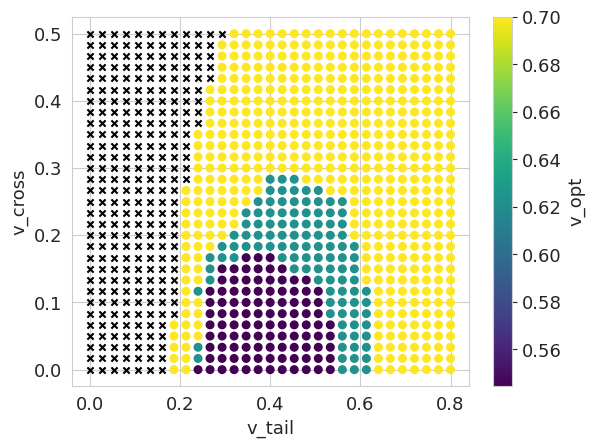

In [122]:
# Read the Data
data = pd.read_csv('../data/Walk/OptMap.dat', sep=' ', header=None, names=['vtail', 'vcross', 'vopt'], index_col=False)

# Separate data into two subsets
data_positive_vopt = data[data['vopt'] >= 0]
data_negative_vopt = data[data['vopt'] < 0]

# Plot the Data for negative vopt with a different shape
plt.scatter(data_negative_vopt['vtail'], data_negative_vopt['vcross'], color='black', s=20, marker='x', label='vopt < 0')

# Plot the Data using a Scatter Plot with a Colormap for positive vopt
plt.scatter(data_positive_vopt['vtail'], data_positive_vopt['vcross'], c=data_positive_vopt['vopt'], cmap='viridis', s=30, marker='o', label='vopt >= 0')



plt.colorbar(label='v_opt')
plt.xlabel('v_tail')
plt.ylabel('v_cross')
#plt.legend()


Text(0, 0.5, 'v_cross')

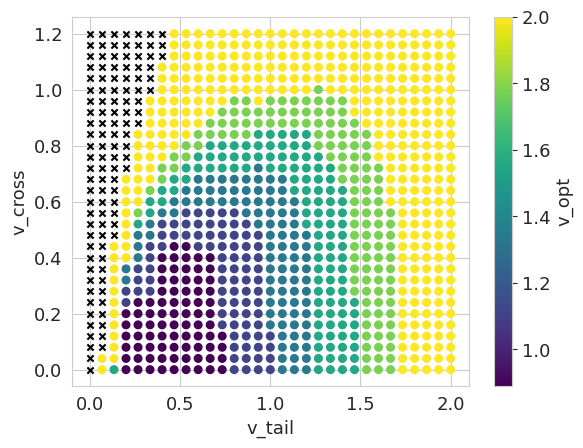

In [129]:
# Read the Data
data = pd.read_csv('../data/Run/OptMap.dat', sep=' ', header=None, names=['vtail', 'vcross', 'vopt'], index_col=False)



# Separate data into two subsets
data_positive_vopt = data[data['vopt'] >= 0]
data_negative_vopt = data[data['vopt'] < 0]

# Plot the Data for negative vopt with a different shape
plt.scatter(data_negative_vopt['vtail'], data_negative_vopt['vcross'], color='black', s=20, marker='x', label='vopt < 0')

# Plot the Data using a Scatter Plot with a Colormap for positive vopt
plt.scatter(data_positive_vopt['vtail'], data_positive_vopt['vcross'], c=data_positive_vopt['vopt'], cmap='viridis',  vmax=2, s=30, marker='o', label='vopt >= 0')



plt.colorbar(label='v_opt')
plt.xlabel('v_tail')
plt.ylabel('v_cross')
#plt.legend()

Text(0, 0.5, 'v_cross')

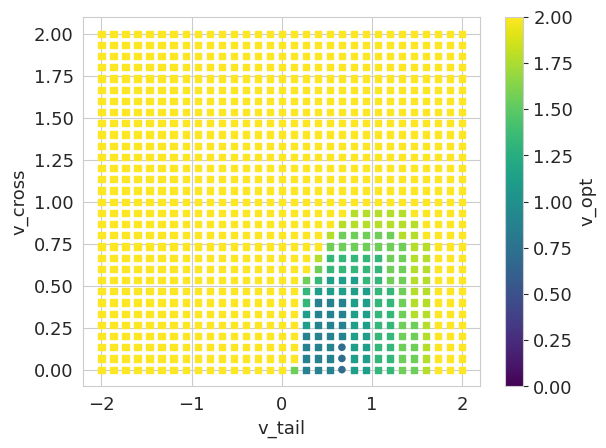

In [92]:
# Read the Data
data = pd.read_csv('../data/Compare/OptMapCompareWide.dat', sep=' ', header=None, names=['vtail', 'vcross', 'vopt', 'type'], index_col=False)



# Separate data into two subsets
data_positive_vopt = data[data['vopt'] >= 0]
data_positive_vopt1 = data_positive_vopt[data_positive_vopt['type'] == 1]
data_positive_vopt2 = data_positive_vopt[data_positive_vopt['type'] == 2]
data_negative_vopt = data[data['vopt'] < 0]

# Plot the Data divided by type
plt.scatter(data_negative_vopt['vtail'], data_negative_vopt['vcross'], color='black', s=20, marker='x', label='vopt < 0')
plt.scatter(data_positive_vopt1['vtail'], data_positive_vopt1['vcross'], c=data_positive_vopt1['vopt'], cmap='viridis', vmin=-0, vmax=2, s=20, marker='o', label='vopt >= 0')
plt.scatter(data_positive_vopt2['vtail'], data_positive_vopt2['vcross'], c=data_positive_vopt2['vopt'], cmap='viridis', vmin=-0, vmax=2, s=20, marker='s', label='vopt >= 0')



plt.colorbar(label='v_opt')
plt.xlabel('v_tail')
plt.ylabel('v_cross')
#plt.legend()

### Optimal curve

In [99]:
def Parable( x, vopt, k, R0 ):
    return k*(x - vopt)**2 + R0

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


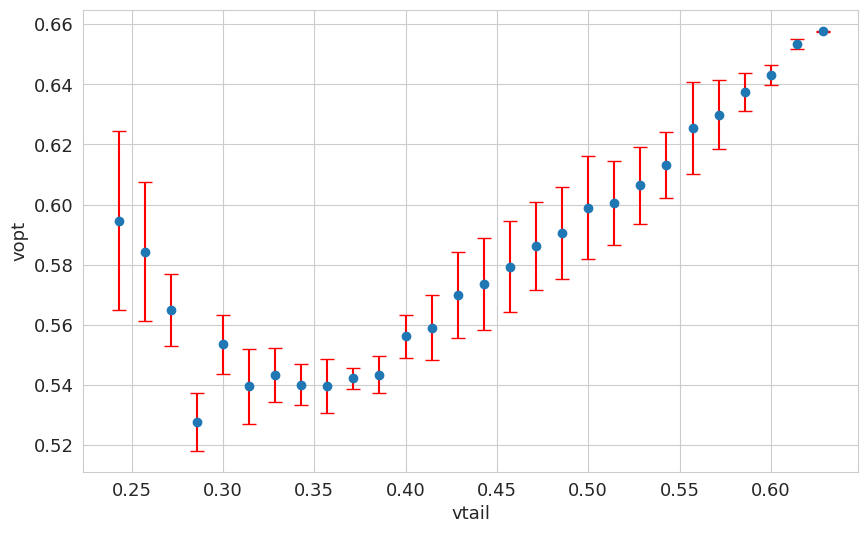

In [187]:
# Read the Data
data = pd.read_csv('../data/Walk/OptFit0.dat', sep=' ', header=None, names=['vtail', 'vb', 'wetness'], index_col=False)


# Initialize a list to store the results
results = []

# Iterate over each unique value of vtail in the actual dataset
for vtail in data['vtail'].unique():
    # Subset the data for the current vtail
    subset = data[data['vtail'] == vtail]
    
    # Adjust the initial guesses if necessary and use curve_fit to fit the new Parable function
    try:
        popt, pcov = curve_fit(Parable, subset['vb'], subset['wetness'], p0=[0.2, 2, 1.0])
        # Extract vopt, k, and R0 from the optimized parameters
        vopt, k, R0 = popt
        
        # Calculate the standard deviation errors from the covariance matrix
        perr = np.sqrt(np.diag(pcov))
        
        # Store the results (including vopt and its error)
        results.append({'vtail': vtail, 'vopt': vopt, 'k': k, 'R0': R0, 'vopt_error': perr[0]})
    except Exception as e:
        # In case of an error during fitting, store NaNs or some indication of failure
        results.append({'vtail': vtail, 'vopt': np.nan, 'k': np.nan, 'R0': np.nan, 'vopt_error': np.nan, 'error': str(e)})

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Filter out rows where 'vopt_error' is inf to avoid plotting issues
results_df_filtered = results_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['vopt', 'vopt_error'])

# Plotting vtail vs. vopt with error bars for vopt_error
plt.figure(figsize=(10, 6))
plt.errorbar(results_df_filtered['vtail'], results_df_filtered['vopt'], yerr=results_df_filtered['vopt_error'], fmt='o', ecolor='r', capsize=5, linestyle='None',)

plt.xlabel('vtail')
plt.ylabel('vopt')
plt.grid(True)

plt.show()


/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_5143/1470914142.py:36: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(results_df_filtered['vtail'], results_df_filtered['vopt'], yerr=results_df_filtered['vopt_error'], fmt='o', ecolor='r', capsize=5, linestyle='None', marker='^', markersize=10)


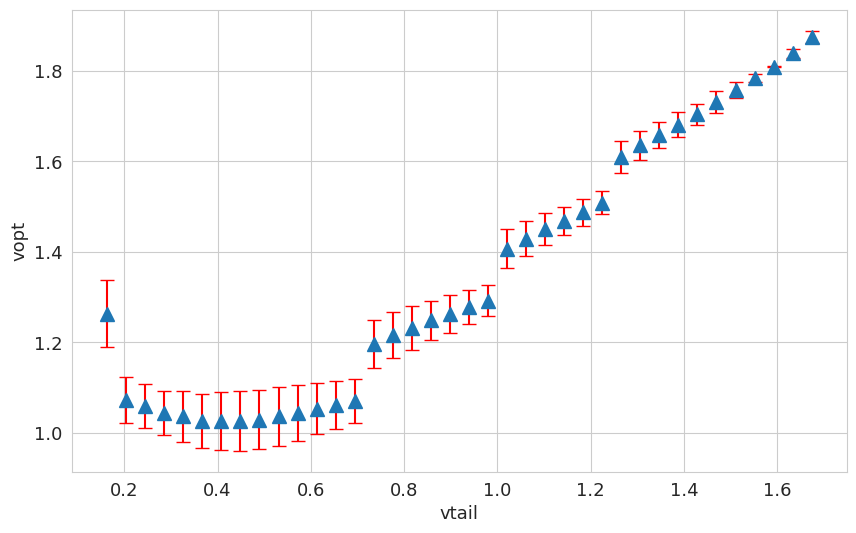

In [188]:
# Read the Data
data = pd.read_csv('../data/Run/OptFit025.dat', sep=' ', header=None, names=['vtail', 'vb', 'wetness'], index_col=False)


# Initialize a list to store the results
results = []

# Iterate over each unique value of vtail in the actual dataset
for vtail in data['vtail'].unique():
    # Subset the data for the current vtail
    subset = data[data['vtail'] == vtail]
    
    # Adjust the initial guesses if necessary and use curve_fit to fit the new Parable function
    try:
        popt, pcov = curve_fit(Parable, subset['vb'], subset['wetness'], p0=[0.2, 2, 1.0])
        # Extract vopt, k, and R0 from the optimized parameters
        vopt, k, R0 = popt
        
        # Calculate the standard deviation errors from the covariance matrix
        perr = np.sqrt(np.diag(pcov))
        
        # Store the results (including vopt and its error)
        results.append({'vtail': vtail, 'vopt': vopt, 'k': k, 'R0': R0, 'vopt_error': perr[0]})
    except Exception as e:
        # In case of an error during fitting, store NaNs or some indication of failure
        results.append({'vtail': vtail, 'vopt': np.nan, 'k': np.nan, 'R0': np.nan, 'vopt_error': np.nan, 'error': str(e)})

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Filter out rows where 'vopt_error' is inf to avoid plotting issues
results_df_filtered = results_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['vopt', 'vopt_error'])

# Plotting vtail vs. vopt with error bars for vopt_error
plt.figure(figsize=(10, 6))
plt.errorbar(results_df_filtered['vtail'], results_df_filtered['vopt'], yerr=results_df_filtered['vopt_error'], fmt='o', ecolor='r', capsize=5, linestyle='None', marker='^', markersize=10)

plt.xlabel('vtail')
plt.ylabel('vopt')
plt.grid(True)

plt.show()

## Printing Shadows

In [ ]:
# # Declare functions to print shadows
# def GraphShadow( infile ):
#     plt.figure()
#     DF = pd.read_csv(infile, sep=',', header=None, names=['x', 'y'], index_col=False)
#     plt.scatter(DF['x'], DF['y'], s=0.1, color='black')
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.axis('off')
#     plt.grid(False)
#     plt.show()

# def GraphShadowPrint( infile, outfile ):
#     plt.figure()
#     DF = pd.read_csv(infile, sep=',', header=None, names=['x', 'y'], index_col=False)
#     plt.scatter(DF['x'], DF['y'], s=0.1, color='black')
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.grid(False)
#     plt.axis('off')
#     plt.savefig(outfile,bbox_inches='tight',pad_inches = 0, dpi = 300)
#     plt.close()


# GraphShadowPrint('../data/Walk/Proj/Walk_xy0.000000.dat', 'WalkFrames/Walk_xy0.000000.png')

In [ ]:
# # Define the start, end, and step values
# start = 0.000000
# end = 0.983333
# step = 0.01666666666

# # Iterate over the range and call GraphShadowPrint for each file
# while start <= end:
#     print(start)
#     infile = f'../data/Walk/Proj/Walk_xy{start:.6f}.dat'
#     outfile = f'WalkFrames/Walk_xy{start:.6f}.png'
#     GraphShadowPrint(infile, outfile)
#     infile = f'../data/Walk/Proj/Walk_xz{start:.6f}.dat'
#     outfile = f'WalkFrames/Walk_xz{start:.6f}.png'
#     GraphShadowPrint(infile, outfile)
#     infile = f'../data/Walk/Proj/Walk_yz{start:.6f}.dat'
#     outfile = f'WalkFrames/Walk_yz{start:.6f}.png'
#     GraphShadowPrint(infile, outfile)
#     infile = f'../data/Run/Proj/Run_xy{start:.6f}.dat'
#     outfile = f'RunFrames/Run_xy{start:.6f}.png'
#     GraphShadowPrint(infile, outfile)
#     infile = f'../data/Run/Proj/Run_xz{start:.6f}.dat'
#     outfile = f'RunFrames/Run_xz{start:.6f}.png'
#     GraphShadowPrint(infile, outfile)
#     infile = f'../data/Run/Proj/Run_yz{start:.6f}.dat'
#     outfile = f'RunFrames/Run_yz{start:.6f}.png'
#     GraphShadowPrint(infile, outfile)
#     start += step